In [93]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import sqlite3
import warnings
warnings.filterwarnings('ignore')

import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_context("paper")


In [94]:
conn = sqlite3.connect(r'/Users/rosaicelaroman/Desktop/portfolio_work/earthquake_modeling/Database/db/earthquake_db')
print("Connected to database...")

Connected to database...


In [95]:
model_df = pd.read_sql_query("SELECT * FROM earthquake_raw", conn)
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06T01:42:39.855Z,37.3840,-117.1075,1.10,1.3,ml,8.0,149.46,0.875,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.1,0.290,4.0,automatic,nn,nn
1,2022-01-06T01:31:33.698Z,38.1810,-117.8180,7.30,1.4,ml,11.0,154.64,0.119,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.0,0.460,5.0,automatic,nn,nn
2,2022-01-06T01:24:20.083Z,61.3407,-149.8852,30.00,1.5,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.2,NaN,NaN,automatic,ak,ak
3,2022-01-06T01:15:15.851Z,62.8703,-150.7625,111.30,2.1,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.8,NaN,NaN,automatic,ak,ak
4,2022-01-06T01:10:44.629Z,64.0145,-148.7657,1.90,1.5,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.6,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28330,2022-01-30T05:22:23.246Z,37.8445,144.8923,10.00,4.3,mb,NaN,126.00,4.178,0.7000,...,2022-02-26T10:52:54.040Z,"off the east coast of Honshu, Japan",earthquake,8.0,1.8,0.137,16.0,reviewed,us,us
28331,2022-01-30T05:08:20.279Z,-30.0533,-177.1517,10.00,4.3,mb,NaN,221.00,1.034,0.6800,...,2022-02-26T10:21:50.040Z,"Kermadec Islands, New Zealand",earthquake,10.8,2.0,0.160,12.0,reviewed,us,us
28332,2022-01-30T03:50:17.124Z,54.2336,-159.7370,22.54,3.0,ml,NaN,219.00,0.604,1.0300,...,2022-02-25T00:07:12.426Z,"132 km SSE of Sand Point, Alaska",earthquake,5.2,14.1,0.088,17.0,reviewed,us,us
28333,2022-01-30T03:46:53.207Z,63.2782,-151.2517,7.40,1.0,ml,NaN,NaN,NaN,0.6600,...,2022-02-25T00:07:27.831Z,"37 km SE of Denali National Park, Alaska",earthquake,NaN,0.2,NaN,NaN,reviewed,ak,ak


In [96]:
model_df['time'] = pd.to_datetime(model_df['time'])
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06 01:42:39.855000+00:00,37.3840,-117.1075,1.10,1.3,ml,8.0,149.46,0.875,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.1,0.290,4.0,automatic,nn,nn
1,2022-01-06 01:31:33.698000+00:00,38.1810,-117.8180,7.30,1.4,ml,11.0,154.64,0.119,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.0,0.460,5.0,automatic,nn,nn
2,2022-01-06 01:24:20.083000+00:00,61.3407,-149.8852,30.00,1.5,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.2,NaN,NaN,automatic,ak,ak
3,2022-01-06 01:15:15.851000+00:00,62.8703,-150.7625,111.30,2.1,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.8,NaN,NaN,automatic,ak,ak
4,2022-01-06 01:10:44.629000+00:00,64.0145,-148.7657,1.90,1.5,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.6,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28330,2022-01-30 05:22:23.246000+00:00,37.8445,144.8923,10.00,4.3,mb,NaN,126.00,4.178,0.7000,...,2022-02-26T10:52:54.040Z,"off the east coast of Honshu, Japan",earthquake,8.0,1.8,0.137,16.0,reviewed,us,us
28331,2022-01-30 05:08:20.279000+00:00,-30.0533,-177.1517,10.00,4.3,mb,NaN,221.00,1.034,0.6800,...,2022-02-26T10:21:50.040Z,"Kermadec Islands, New Zealand",earthquake,10.8,2.0,0.160,12.0,reviewed,us,us
28332,2022-01-30 03:50:17.124000+00:00,54.2336,-159.7370,22.54,3.0,ml,NaN,219.00,0.604,1.0300,...,2022-02-25T00:07:12.426Z,"132 km SSE of Sand Point, Alaska",earthquake,5.2,14.1,0.088,17.0,reviewed,us,us
28333,2022-01-30 03:46:53.207000+00:00,63.2782,-151.2517,7.40,1.0,ml,NaN,NaN,NaN,0.6600,...,2022-02-25T00:07:27.831Z,"37 km SE of Denali National Park, Alaska",earthquake,NaN,0.2,NaN,NaN,reviewed,ak,ak


In [97]:
#adding column of converted time to datetime
model_df['Unix Time'] = pd.to_datetime(model_df['time']).astype(int)/10**9
model_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unix Time
0,2022-01-06 01:42:39.855000+00:00,37.3840,-117.1075,1.1,1.3,ml,8.0,149.46,0.875,0.2175,...,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.1,0.29,4.0,automatic,nn,nn,1.641433e+09
1,2022-01-06 01:31:33.698000+00:00,38.1810,-117.8180,7.3,1.4,ml,11.0,154.64,0.119,0.1017,...,"34 km SE of Mina, Nevada",earthquake,NaN,2.0,0.46,5.0,automatic,nn,nn,1.641433e+09
2,2022-01-06 01:24:20.083000+00:00,61.3407,-149.8852,30.0,1.5,ml,NaN,NaN,NaN,0.7500,...,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.2,NaN,NaN,automatic,ak,ak,1.641432e+09
3,2022-01-06 01:15:15.851000+00:00,62.8703,-150.7625,111.3,2.1,ml,NaN,NaN,NaN,0.3200,...,"41 km N of Petersville, Alaska",earthquake,NaN,0.8,NaN,NaN,automatic,ak,ak,1.641432e+09
4,2022-01-06 01:10:44.629000+00:00,64.0145,-148.7657,1.9,1.5,ml,NaN,NaN,NaN,0.7200,...,"17 km E of Ferry, Alaska",earthquake,NaN,0.6,NaN,NaN,automatic,ak,ak,1.641431e+09


In [98]:
#drop columns not needed
cleaned_df = model_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_df

,latitude,longitude,depth,mag,Unix Time
0,37.3840,-117.1075,1.10,1.3,1.641433e+09
1,38.1810,-117.8180,7.30,1.4,1.641433e+09
2,61.3407,-149.8852,30.00,1.5,1.641432e+09
3,62.8703,-150.7625,111.30,2.1,1.641432e+09
4,64.0145,-148.7657,1.90,1.5,1.641431e+09
...,...,...,...,...,...
28330,37.8445,144.8923,10.00,4.3,1.643520e+09
28331,-30.0533,-177.1517,10.00,4.3,1.643519e+09
28332,54.2336,-159.7370,22.54,3.0,1.643515e+09
28333,63.2782,-151.2517,7.40,1.0,1.643514e+09


In [99]:
cleaned_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          6
Unix Time    0
dtype: int64

In [100]:
cleaned_df_dropped = cleaned_df.dropna()

In [101]:
cleaned_df_dropped = cleaned_df_dropped.rename(columns={'mag':'label'})
cleaned_df_dropped

,latitude,longitude,depth,label,Unix Time
0,37.3840,-117.1075,1.10,1.3,1.641433e+09
1,38.1810,-117.8180,7.30,1.4,1.641433e+09
2,61.3407,-149.8852,30.00,1.5,1.641432e+09
3,62.8703,-150.7625,111.30,2.1,1.641432e+09
4,64.0145,-148.7657,1.90,1.5,1.641431e+09
...,...,...,...,...,...
28330,37.8445,144.8923,10.00,4.3,1.643520e+09
28331,-30.0533,-177.1517,10.00,4.3,1.643519e+09
28332,54.2336,-159.7370,22.54,3.0,1.643515e+09
28333,63.2782,-151.2517,7.40,1.0,1.643514e+09


In [102]:
#establish features to be used in model. X will use: latitude, longitude, depth and unix time. Y will be magnitude
X = cleaned_df_dropped.drop(['label'], axis = 1)
X = np.asarray(X)

y = cleaned_df_dropped[['label']]
y= np.asarray(y)

In [103]:
#scale and transform the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [105]:
#following example: https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model


inputs = Input(shape=(4,))

input_layer = (inputs)
hidden_layer1 = Dense(10, activation='relu')(input_layer)
hidden_layer2 = Dense(5, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(5, activation='relu')(hidden_layer2)
output = Dense(1, activation='linear')(hidden_layer3)

model = Model(inputs=inputs, outputs=output)


# model = Sequential([
#     Dense(5, activation='relu', input_shape=(4,)),
#     Dense(10, activation='relu'),
#     Dense(3, activation='softmax')
# ])

model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [106]:
#from https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

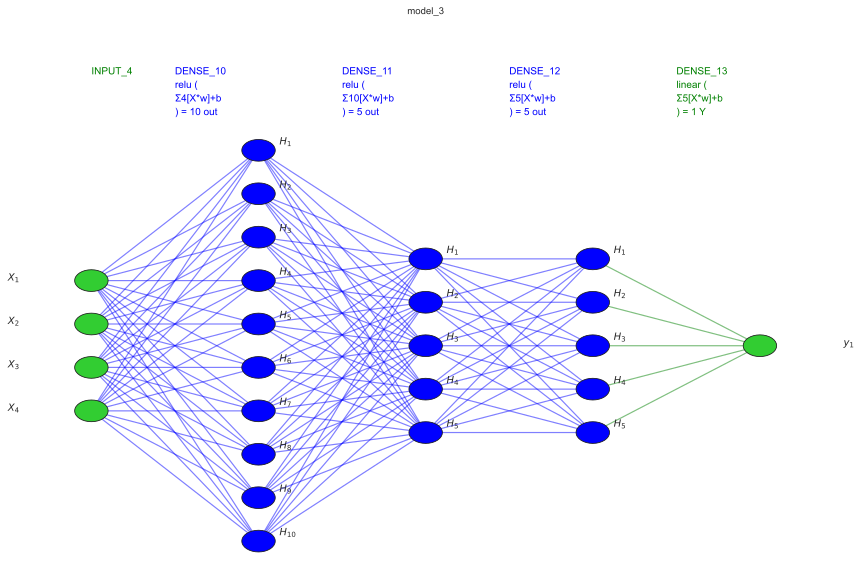

In [107]:
visualize_nn(model, description=True, figsize=(15,10))

In [108]:
model.compile(
    optimizer='Adagrad',
    loss="mean_squared_error",
    metrics = ['mae']
)

In [109]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=400,
    validation_split=0.2,
    verbose=2
)

Epoch 1/400
475/475 - 1s - loss: 1.3251 - mae: 0.7971 - val_loss: 1.1602 - val_mae: 0.7651
Epoch 2/400
475/475 - 0s - loss: 1.1382 - mae: 0.7615 - val_loss: 1.0619 - val_mae: 0.7463
Epoch 3/400
475/475 - 0s - loss: 1.0575 - mae: 0.7452 - val_loss: 0.9998 - val_mae: 0.7335
Epoch 4/400
475/475 - 0s - loss: 0.9971 - mae: 0.7320 - val_loss: 0.9458 - val_mae: 0.7211
Epoch 5/400
475/475 - 0s - loss: 0.9412 - mae: 0.7184 - val_loss: 0.8979 - val_mae: 0.7085
Epoch 6/400
475/475 - 0s - loss: 0.8933 - mae: 0.7049 - val_loss: 0.8567 - val_mae: 0.6959
Epoch 7/400
475/475 - 0s - loss: 0.8498 - mae: 0.6903 - val_loss: 0.8171 - val_mae: 0.6807
Epoch 8/400
475/475 - 0s - loss: 0.8080 - mae: 0.6737 - val_loss: 0.7798 - val_mae: 0.6648
Epoch 9/400
475/475 - 0s - loss: 0.7699 - mae: 0.6576 - val_loss: 0.7453 - val_mae: 0.6491
Epoch 10/400
475/475 - 0s - loss: 0.7320 - mae: 0.6403 - val_loss: 0.7091 - val_mae: 0.6312
Epoch 11/400
475/475 - 0s - loss: 0.6940 - mae: 0.6220 - val_loss: 0.6743 - val_mae: 0.61

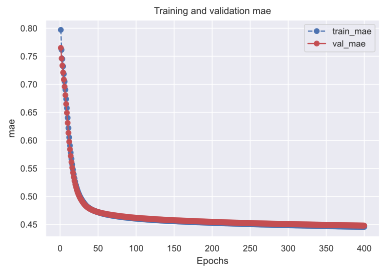

In [110]:
#following example: https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'mae')

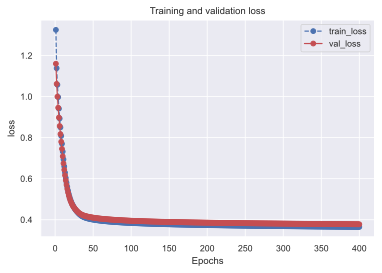

In [111]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'loss')

In [112]:
# def get_uncompiled_model():
#     inputs = keras.Input(shape=(784,), name="digits")
#     x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
#     x = layers.Dense(64, activation="relu", name="dense_2")(x)
#     outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
#     model = keras.Model(inputs=inputs, outputs=outputs)
#     return model


# def get_compiled_model():
#     model = get_uncompiled_model()
#     model.compile(
#         optimizer="rmsprop",
#         loss="sparse_categorical_crossentropy",
#         metrics=["sparse_categorical_accuracy"],
#     )
#     return model

In [113]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test mae:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:])
print("predictions shape:", predictions.shape)

Evaluate on test data
293/293 [==============================] - 0s 458us/step - loss: 0.3702 - mae: 0.4465
test loss, test mae: [0.3702256381511688, 0.44647738337516785]
Generate predictions for 3 samples
predictions shape: (9349, 1)


In [114]:
predictions_t=sc_y.inverse_transform(predictions)
print(predictions_t)

[[1.3102442 ]
 [1.2588776 ]
 [4.593729  ]
 ...
 [1.2667285 ]
 [0.95318335]
 [1.6299881 ]]


In [115]:
actual_mag=sc_y.inverse_transform(y_test)
df_pred = pd.DataFrame(actual_mag, columns=['Actual'])
df_pred['Predicted'] = predictions_t
df_pred

,Actual,Predicted
0,0.19,1.310244
1,1.95,1.258878
2,5.50,4.593729
3,4.70,4.412284
4,1.70,1.775796
...,...,...
9344,0.90,1.248735
9345,-0.65,0.840853
9346,0.29,1.266729
9347,1.22,0.953183


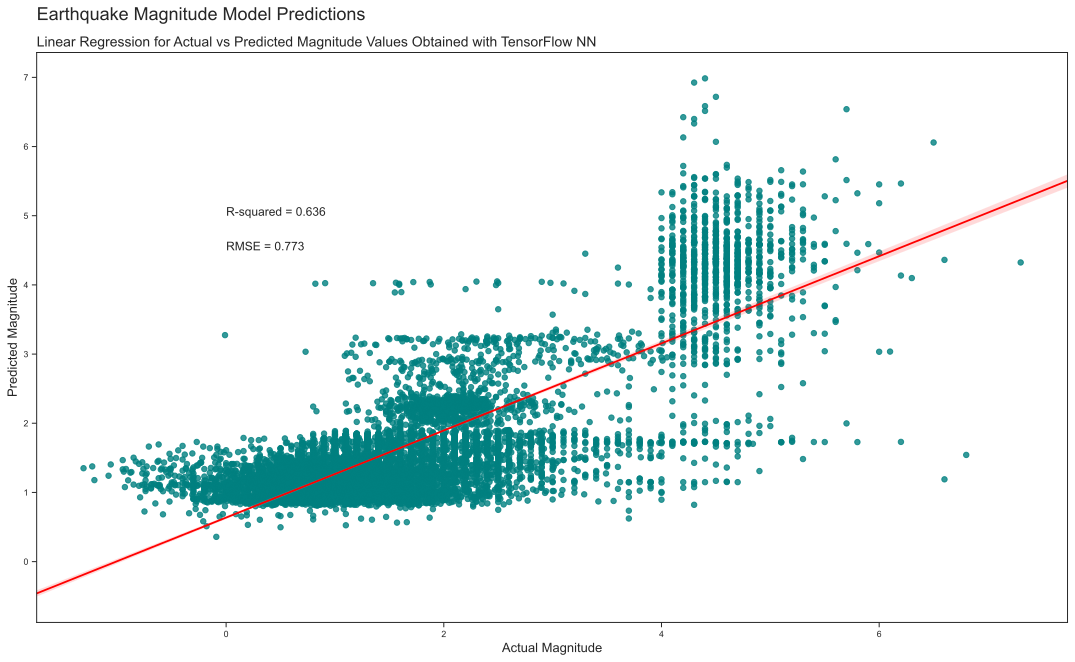

In [127]:
x = np.array(df_pred['Actual'])
y = np.array(df_pred['Predicted'])
test_mse = mean_squared_error(actual_mag,predictions_t)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'teal'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle('Earthquake Magnitude Model Predictions', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Obtained with TensorFlow NN', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(x, y)), (0, 5),  fontsize=12)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 4.5), fontsize=12)

# fig.savefig('extratrees_mag_linear_sns.png', dpi=600)
plt.show()

In [117]:
page_url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv"

test_df = pd.read_csv(page_url)
test_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-12T01:44:13.050Z,41.029499,-121.745499,1.11,2.17,md,25.0,50.00,0.072710,0.0800,...,2022-03-12T01:45:46.928Z,"14km E of Big Bend, CA",earthquake,0.20,1.27,0.120,14.0,automatic,nc,nc
1,2022-03-12T01:32:46.004Z,38.139600,-118.277400,0.50,1.00,ml,11.0,166.15,0.211000,0.2769,...,2022-03-12T01:36:38.958Z,"31 km SSW of Mina, Nevada",earthquake,NaN,13.40,0.400,6.0,automatic,nn,nn
2,2022-03-12T01:28:20.163Z,58.248400,-151.235100,61.20,2.30,ml,NaN,NaN,NaN,0.8700,...,2022-03-12T01:30:43.562Z,"83 km ENE of Ouzinkie, Alaska",earthquake,NaN,2.50,NaN,NaN,automatic,ak,ak
3,2022-03-12T01:16:01.800Z,33.967500,-116.831500,6.63,1.15,ml,17.0,162.00,0.132200,0.2500,...,2022-03-12T01:19:38.493Z,"6km NE of Banning, CA",earthquake,1.05,3.44,0.324,14.0,automatic,ci,ci
4,2022-03-12T00:59:16.700Z,38.815166,-122.820503,2.73,0.50,md,12.0,66.00,0.009246,0.0200,...,2022-03-12T01:37:14.770Z,"7km NW of The Geysers, CA",earthquake,0.39,0.79,0.360,2.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022-03-11T02:16:59.550Z,38.829500,-122.797167,1.20,1.67,md,50.0,31.00,0.010370,0.0400,...,2022-03-11T11:18:14.444Z,"6km W of Cobb, CA",earthquake,0.11,0.17,0.136,18.0,reviewed,nc,nc
248,2022-03-11T02:13:42.330Z,38.827000,-122.814331,0.97,0.85,md,6.0,133.00,0.004900,0.0200,...,2022-03-11T02:21:11.210Z,"8km NW of The Geysers, CA",earthquake,0.40,0.97,NaN,1.0,automatic,nc,nc
249,2022-03-11T02:07:08.640Z,36.486833,-81.118333,1.50,1.94,md,9.0,123.00,0.459300,0.3400,...,2022-03-11T15:23:25.185Z,"2 km S of Sparta, North Carolina",earthquake,1.49,8.26,0.047,5.0,reviewed,se,se
250,2022-03-11T02:06:03.010Z,38.821167,-122.804500,2.73,0.43,md,25.0,41.00,0.004890,0.0300,...,2022-03-11T07:29:10.959Z,"6km NW of The Geysers, CA",earthquake,0.22,0.29,0.070,4.0,reviewed,nc,nc


In [118]:
test_df['Unix Time'] = pd.to_datetime(test_df['time']).astype(int)/10**9

In [119]:
cleaned_test_df = test_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_test_df

,latitude,longitude,depth,mag,Unix Time
0,41.029499,-121.745499,1.11,2.17,1.647049e+09
1,38.139600,-118.277400,0.50,1.00,1.647049e+09
2,58.248400,-151.235100,61.20,2.30,1.647049e+09
3,33.967500,-116.831500,6.63,1.15,1.647048e+09
4,38.815166,-122.820503,2.73,0.50,1.647047e+09
...,...,...,...,...,...
247,38.829500,-122.797167,1.20,1.67,1.646965e+09
248,38.827000,-122.814331,0.97,0.85,1.646965e+09
249,36.486833,-81.118333,1.50,1.94,1.646964e+09
250,38.821167,-122.804500,2.73,0.43,1.646964e+09


In [120]:
cleaned_test_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
Unix Time    0
dtype: int64

In [121]:
#establish features to be used in model. X will use: latitude, longitude, depth and unix time. Y will be magnitude
X = cleaned_test_df.drop(['mag'], axis = 1)
X = np.asarray(X)

y = cleaned_test_df[['mag']]
y= np.asarray(y)

In [122]:
#scale and transform the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [123]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X, y)
print("test loss, test mae:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(X[:])
print("predictions shape:", predictions.shape)

Evaluate on test data
8/8 [==============================] - 0s 698us/step - loss: 0.2982 - mae: 0.4175
test loss, test mae: [0.29817694425582886, 0.4174721837043762]
Generate predictions for all samples
predictions shape: (252, 1)


In [124]:
predictions_t2=sc_y.inverse_transform(predictions)
print(predictions_t2)

[[0.82676464]
 [0.8483253 ]
 [1.4814293 ]
 [1.1163176 ]
 [0.81899446]
 [1.430967  ]
 [1.5111285 ]
 [0.88110995]
 [0.98658746]
 [1.5238054 ]
 [1.2035823 ]
 [1.5486085 ]
 [0.80180544]
 [0.7923095 ]
 [1.8226827 ]
 [1.1612498 ]
 [1.0173719 ]
 [1.3373188 ]
 [0.92871076]
 [0.77978224]
 [1.2103765 ]
 [0.9643826 ]
 [4.067089  ]
 [0.95585865]
 [0.9208813 ]
 [1.3897922 ]
 [1.2388713 ]
 [0.76635087]
 [0.99469435]
 [1.4161897 ]
 [1.0214818 ]
 [1.0025399 ]
 [0.9852621 ]
 [0.78569335]
 [1.9346174 ]
 [1.5690676 ]
 [1.6155711 ]
 [0.8032194 ]
 [0.9814401 ]
 [0.8592831 ]
 [1.6015188 ]
 [0.91854477]
 [0.76601034]
 [1.0632532 ]
 [3.4332523 ]
 [0.7684125 ]
 [1.1241031 ]
 [1.1327955 ]
 [1.1230431 ]
 [0.7544849 ]
 [0.7528725 ]
 [0.76134866]
 [0.98490036]
 [1.417737  ]
 [0.97845274]
 [1.4218346 ]
 [0.95831144]
 [4.3569098 ]
 [0.827089  ]
 [0.77195513]
 [0.8292539 ]
 [1.3243632 ]
 [1.4633133 ]
 [1.5413251 ]
 [0.752694  ]
 [0.7414399 ]
 [0.9205599 ]
 [0.98452514]
 [1.3973974 ]
 [0.7522972 ]
 [0.7533997 ]
 [0.75

In [125]:
actual_mag2=sc_y.inverse_transform(y)
dftest_pred = pd.DataFrame(actual_mag2, columns=['Actual'])
dftest_pred['Predicted'] = predictions_t2
dftest_pred

,Actual,Predicted
0,2.17,0.826765
1,1.00,0.848325
2,2.30,1.481429
3,1.15,1.116318
4,0.50,0.818994
...,...,...
247,1.67,1.065756
248,0.85,1.062655
249,1.94,2.076519
250,0.43,1.115122


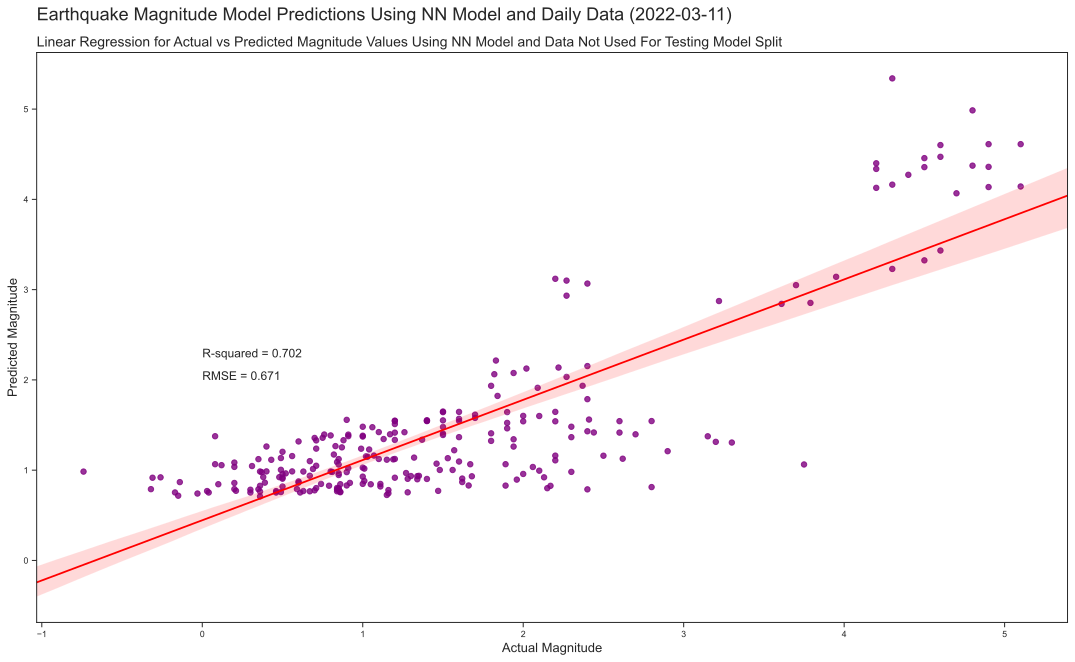

In [126]:
from datetime import date
today = date.today()

x = np.array(dftest_pred['Actual'])
y = np.array(dftest_pred["Predicted"])
test_mse = mean_squared_error(actual_mag2,predictions_t2)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'purple'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle(f'Earthquake Magnitude Model Predictions Using NN Model and Daily Data ({today})', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Using NN Model and Data Not Used For Testing Model Split', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(x, y)), (0, 2.25),  fontsize=12)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 2), fontsize=12)

# fig.savefig('extratrees_mag_linear_sns.png', dpi=600)
plt.show()